# **Stock Price Prediction System**

 The Stock Trend Prediction project leverages advanced machine learning techniques, specifically the **Long Short-Term Memory (LSTM)** neural network architecture, to forecast stock prices based on historical data.


 Utilizing the “**yfinance library**” , the project collects and preprocesses extensive stock price data, transforming it into sequences suitable for training the LSTM model.

 The methodology involves splitting the dataset into training and testing sets, training the model on past 100 and 200 days' stock prices, and evaluating its performance using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


The project incorporates the Streamlit framework to create an interactive web application, providing users with a dynamic platform to visualize stock trends. Users can input a stock ticker symbol, and the LSTM model dynamically predicts and displays future stock prices, allowing for real-time analysis and decision-making.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import streamlit as st

In [10]:
start = '2012-01-01'
end = '2023-11-30'
stock_symbol = 'NFLX'
#'NFLX==>Netflix'
#stock symobol is given as input by the user for eg:TSLA
df = yf.download(stock_symbol, start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2.997000e+03
mean,231.033750,234.589798,227.359398,231.066552,231.066552,1.449639e+07
std,177.605962,180.057422,174.970125,177.530264,177.530264,1.621752e+07
min,7.712857,7.925714,7.544286,7.685714,7.685714,1.144000e+06
25%,64.285713,64.934288,63.202858,64.155716,64.155716,5.490100e+06
50%,189.199997,191.399994,185.910004,188.820007,188.820007,9.422000e+06
75%,363.600006,368.850006,358.019989,363.519989,363.519989,1.769880e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,2.140733e+08


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-22,476.799988,482.700012,476.559998,478.000000,478.000000,2841600
2023-11-24,477.109985,480.399994,475.200012,479.559998,479.559998,1404700
2023-11-27,479.029999,482.000000,475.350006,479.170013,479.170013,3625900
2023-11-28,478.109985,480.500000,475.950012,479.000000,479.000000,2890200
2023-11-29,479.000000,480.989990,474.489990,477.190002,477.190002,2855500


**Reset the Index**

In [13]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
1,2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2,2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
3,2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
4,2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300


In [14]:
#removing the columns of Date, AdjClose
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,10.040000,10.388571,10.018571,10.320000,29213800
1,10.335714,11.567143,10.258571,11.492857,100489900
2,11.345714,11.694286,11.040000,11.328571,86552900
3,11.302857,12.471429,11.242857,12.327143,125610800
4,12.801429,14.235714,12.448571,14.025714,214073300


Text(0.5, 1.0, 'NFLX')

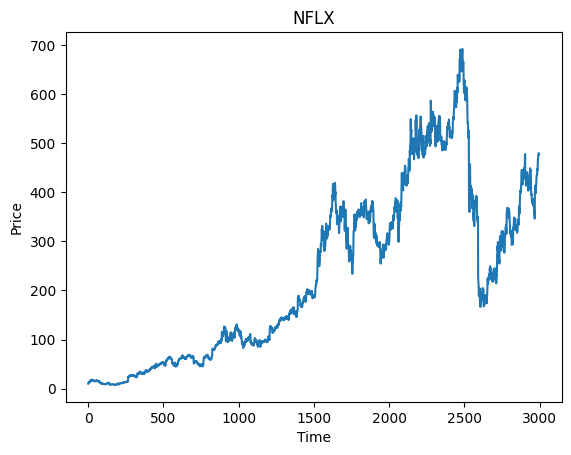

In [15]:
#Using only the close column for this project and accordingly ploltting the graph
plt.plot(df.Close)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(stock_symbol)


In [16]:
df

,Open,High,Low,Close,Volume
0,10.040000,10.388571,10.018571,10.320000,29213800
1,10.335714,11.567143,10.258571,11.492857,100489900
2,11.345714,11.694286,11.040000,11.328571,86552900
3,11.302857,12.471429,11.242857,12.327143,125610800
4,12.801429,14.235714,12.448571,14.025714,214073300
...,...,...,...,...,...
2992,476.799988,482.700012,476.559998,478.000000,2841600
2993,477.109985,480.399994,475.200012,479.559998,1404700
2994,479.029999,482.000000,475.350006,479.170013,3625900
2995,478.109985,480.500000,475.950012,479.000000,2890200


**Caluclating moving average for 100 days**

In [17]:
#caluclating moving average for 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2992    418.966699
2993    419.303299
2994    419.706599
2995    420.115599
2996    420.470399
Name: Close, Length: 2997, dtype: float64

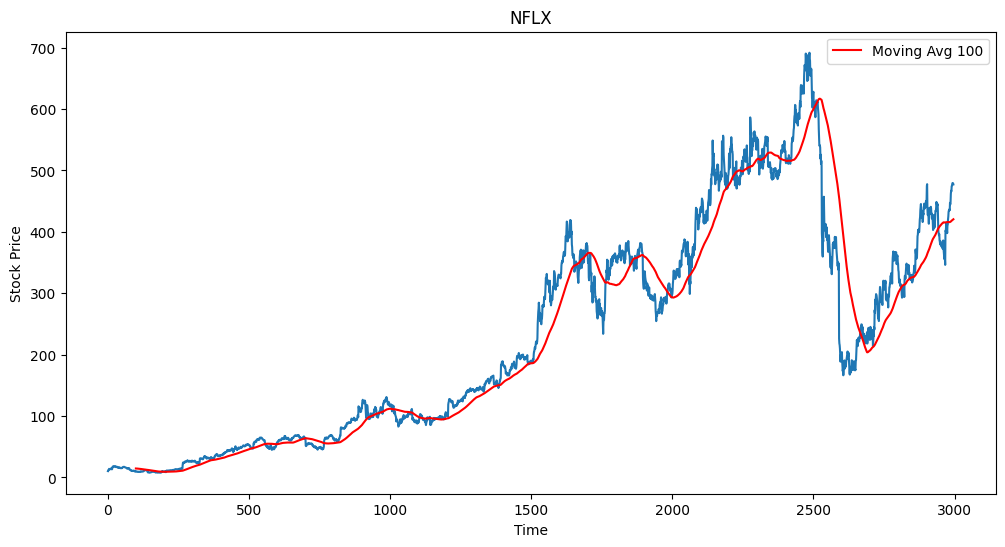

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r', label = 'Moving Avg 100')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()

**Caluculating the moving average for 200 days**

In [19]:
#caluclating moving average for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2992    385.88750
2993    386.45115
2994    387.03450
2995    387.69270
2996    388.28580
Name: Close, Length: 2997, dtype: float64

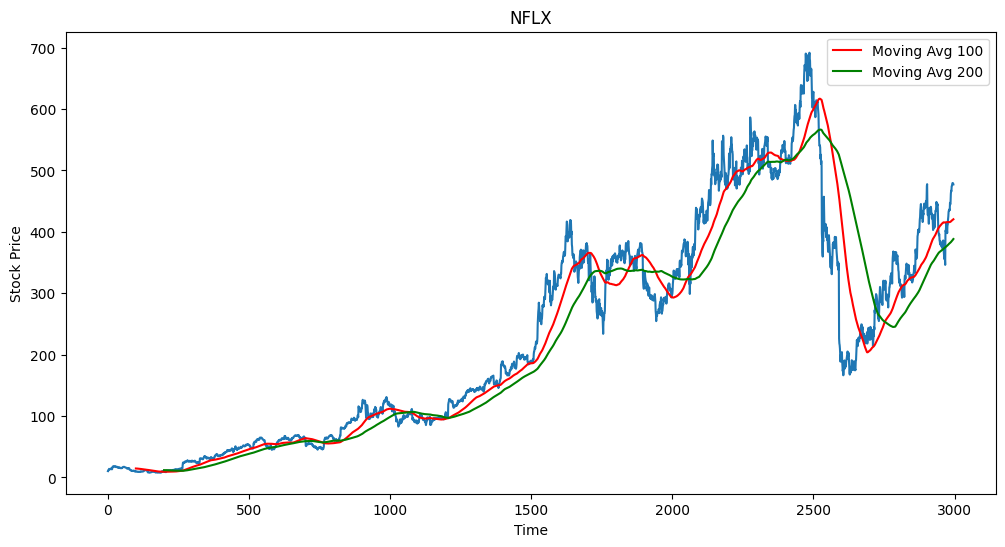

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r', label = 'Moving Avg 100')
plt.plot(ma200, 'g' , label = 'Moving Avg 200')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()

In [21]:
df.shape

(2997, 5)

# Splitting Data into Training and Testing

In [22]:
#Splitting the data into training and testing

#  70% data is Training Data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

#  30% Data is Testing Data
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2097, 1)
(900, 1)


In [23]:
data_training.head()

,Close
0,10.320000
1,11.492857
2,11.328571
3,12.327143
4,14.025714


In [24]:
data_testing.head()

,Close
2097,424.679993
2098,434.260010
2099,436.529999
2100,435.549988
2101,440.519989


# Scaling the Data between 0 and 1

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00610517],
       [0.00882336],
       [0.00844262],
       ...,
       [0.95522431],
       [0.94460975],
       [0.97446021]])

In [27]:
data_training_array.shape

(2097, 1)

# Dividing the data into X-train and Y-train

In [28]:
x_train = []
y_train = []


#Taking the stock price for 100 days
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])  #from 0th index till 100th
    y_train.append(data_training_array[i,0])      #considering only 1 column


x_train, y_train = np.array(x_train), np.array(y_train)

# ML Model

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80 , activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 22s 274ms/step - loss: 0.0346
Epoch 2/50
63/63 [==============================] - 18s 291ms/step - loss: 0.0102
Epoch 3/50
63/63 [==============================] - 20s 316ms/step - loss: 0.0071
Epoch 4/50
63/63 [==============================] - 21s 327ms/step - loss: 0.0068
Epoch 5/50
63/63 [==============================] - 20s 308ms/step - loss: 0.0060
Epoch 6/50
63/63 [==============================] - 21s 329ms/step - loss: 0.0063
Epoch 7/50
63/63 [==============================] - 21s 341ms/step - loss: 0.0048
Epoch 8/50
63/63 [==============================] - 20s 314ms/step - loss: 0.0055
Epoch 9/50
63/63 [==============================] - 23s 368ms/step - loss: 0.0046
Epoch 10/50
63/63 [==============================] - 21s 335ms/step - loss: 0.0052
Epoch 11/50
63/63 [==============================] - 18s 288ms/step - loss: 0.0046
Epoch 12/50
63/63 [==============================] - 18s 278ms/step - loss: 0.0044
Epoch 13/50
6

In [33]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
data_testing.head()

,Close
2097,424.679993
2098,434.260010
2099,436.529999
2100,435.549988
2101,440.519989


In [36]:
past_100_days = data_training.tail(100)

In [37]:
type(past_100_days)

pandas.core.frame.DataFrame

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

,Close
0,293.119995
1,298.929993
2,298.440002
3,298.500000
4,304.209991


# Again Scale Down

In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2412815 ],
       [0.25234142],
       [0.25140868],
       [0.25152289],
       [0.26239244],
       [0.28384606],
       [0.29397318],
       [0.31571233],
       [0.32462118],
       [0.31738751],
       [0.31757789],
       [0.31649282],
       [0.30975405],
       [0.29875124],
       [0.29924619],
       [0.31112465],
       [0.30368156],
       [0.32258431],
       [0.31291404],
       [0.32911371],
       [0.32226073],
       [0.30967789],
       [0.32846649],
       [0.32802864],
       [0.32875202],
       [0.32789537],
       [0.32989419],
       [0.32692452],
       [0.30387193],
       [0.34879694],
       [0.35557376],
       [0.33600473],
       [0.34674102],
       [0.33653774],
       [0.34525621],
       [0.34021168],
       [0.36478718],
       [0.38574585],
       [0.38700224],
       [0.38182444],
       [0.38148175],
       [0.38966727],
       [0.3946547 ],
       [0.40668547],
       [0.40933145],
       [0.40742785],
       [0.42147643],
       [0.418

In [41]:
input_data.shape

(1000, 1)

In [42]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(900, 100, 1)
(900,)


# Making Predictions

In [44]:
y_predicted = model.predict(x_test)

29/29 [==============================] - 3s 77ms/step


In [45]:
y_predicted.shape

(900, 1)

In [46]:
y_test

array([0.49171932, 0.50995586, 0.51427701, 0.51241146, 0.52187236,
       0.50531106, 0.51758926, 0.52459456, 0.54789462, 0.54482979,
       0.54189829, 0.53548316, 0.51374401, 0.50055206, 0.47285462,
       0.48260111, 0.47032286, 0.48229653, 0.49407983, 0.4967258 ,
       0.48656058, 0.47201703, 0.48204905, 0.48183962, 0.50955606,
       0.51037465, 0.4933945 , 0.47913654, 0.49328029, 0.51351558,
       0.53567348, 0.53967105, 0.54699993, 0.57425952, 0.57087111,
       0.55486181, 0.57020484, 0.52735475, 0.53466457, 0.5495127 ,
       0.60776292, 0.5911064 , 0.62331531, 0.62207798, 0.64039062,
       0.64987057, 0.72786108, 0.68364045, 0.68246022, 0.6793764 ,
       0.68723828, 0.62175434, 0.63968629, 0.61625296, 0.61571996,
       0.59241983, 0.59788322, 0.62681793, 0.61322624, 0.60555473,
       0.60806744, 0.61393057, 0.63247163, 0.65344935, 0.63911518,
       0.65238328, 0.62506665, 0.60346076, 0.57214649, 0.58840326,
       0.59955834, 0.60212821, 0.60150005, 0.61962232, 0.60564

In [47]:
y_predicted

array([[0.5021173 ],
       [0.5035112 ],
       [0.5048494 ],
       [0.506534  ],
       [0.5087383 ],
       [0.5115719 ],
       [0.5148016 ],
       [0.51828146],
       [0.52195835],
       [0.52605295],
       [0.530658  ],
       [0.5356569 ],
       [0.5407438 ],
       [0.54535663],
       [0.54893875],
       [0.5508956 ],
       [0.5510632 ],
       [0.5494623 ],
       [0.54643404],
       [0.54253554],
       [0.5383266 ],
       [0.53414613],
       [0.53005654],
       [0.52616477],
       [0.5225624 ],
       [0.5195993 ],
       [0.5175657 ],
       [0.5164085 ],
       [0.51578635],
       [0.5155241 ],
       [0.51573205],
       [0.5167415 ],
       [0.51883566],
       [0.5221735 ],
       [0.5270039 ],
       [0.5332047 ],
       [0.54024243],
       [0.54770994],
       [0.5546862 ],
       [0.56057453],
       [0.565287  ],
       [0.5696043 ],
       [0.57399905],
       [0.5790523 ],
       [0.58499193],
       [0.5919653 ],
       [0.5999856 ],
       [0.609

# Again to compare Scale Up the Values

In [48]:
scaler.scale_

array([0.0019036])

In [49]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

# Final Prediction

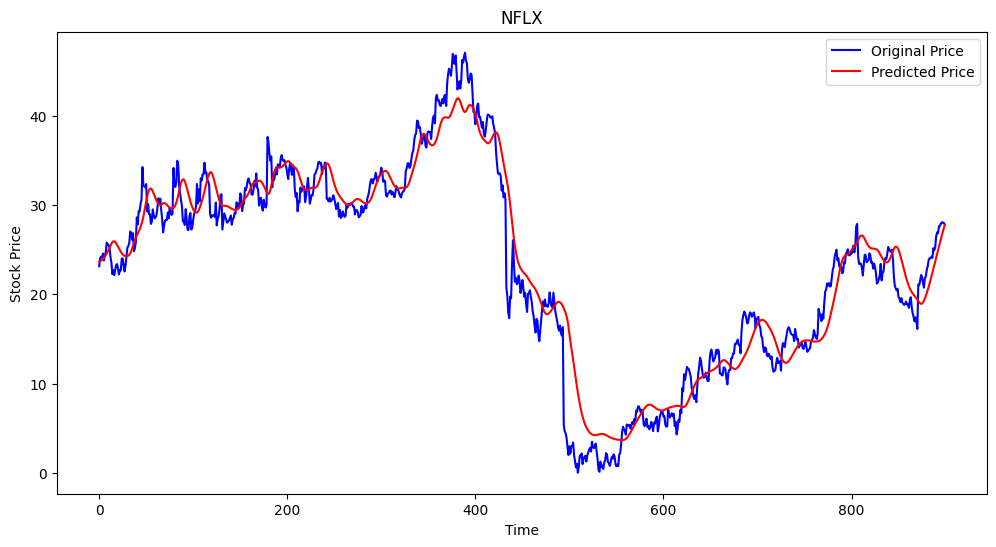

In [51]:
#Final Prediction

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_symbol)
plt.legend()
plt.show()